# Crowdedness in the Gym

## A project with an aim to use Stochastic Gradient Descent on Linear Regression.

We will use a dataset which contains over 60,000 observations about how many people were at the gym on a particular day and time.

## Importing and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
gym = pd.read_csv('crowdness_gym_data.csv')

In [3]:
gym.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [4]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


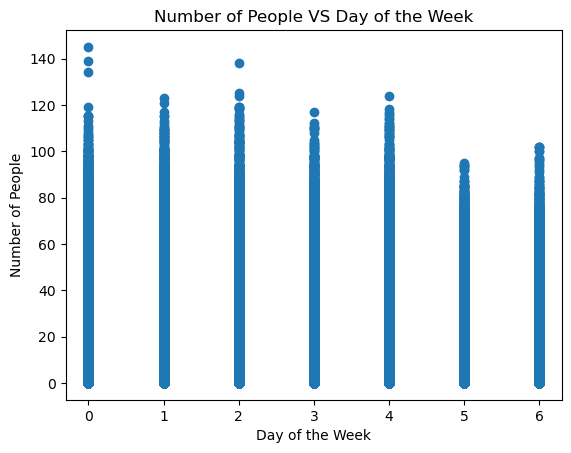

In [5]:
plt.scatter(gym['day_of_week'], gym['number_people'])
plt.title("Number of People VS Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('Number of People')
plt.show()

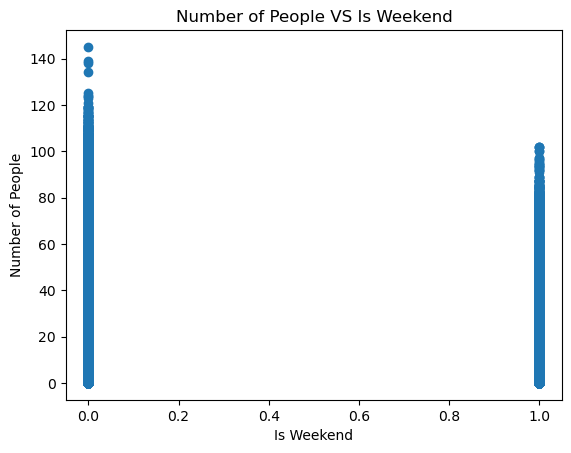

In [6]:
plt.scatter(gym['is_weekend'], gym['number_people'])
plt.title("Number of People VS Is Weekend")
plt.xlabel('Is Weekend')
plt.ylabel('Number of People')
plt.show()

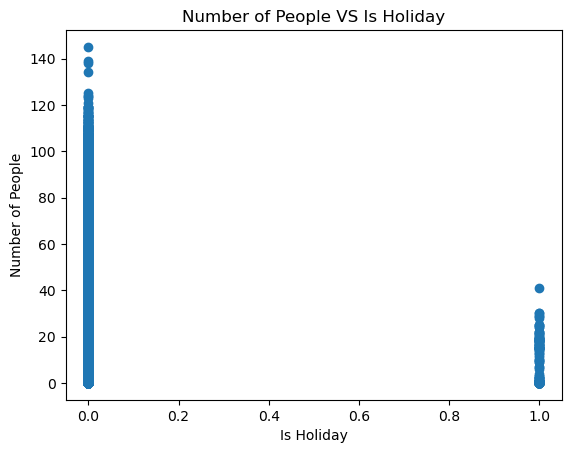

In [7]:
plt.scatter(gym['is_holiday'], gym['number_people'])
plt.title("Number of People VS Is Holiday")
plt.xlabel('Is Holiday')
plt.ylabel('Number of People')
plt.show()

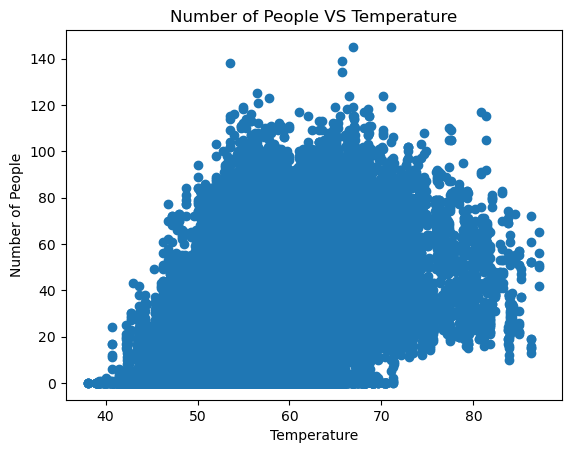

In [8]:
plt.scatter(gym['temperature'], gym['number_people'])
plt.title("Number of People VS Temperature")
plt.xlabel('Temperature')
plt.ylabel('Number of People')
plt.show()

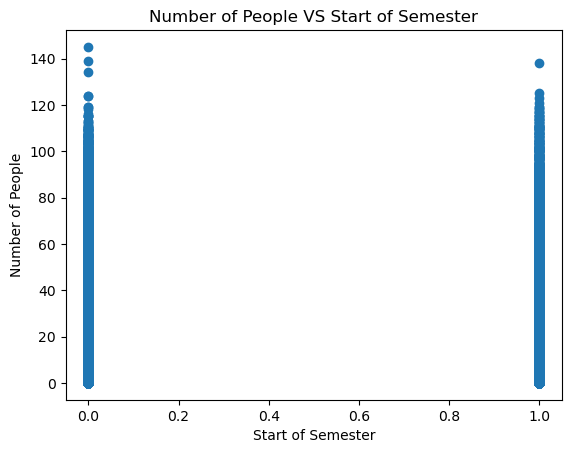

In [9]:
plt.scatter(gym['is_start_of_semester'], gym['number_people'])
plt.title("Number of People VS Start of Semester")
plt.xlabel('Start of Semester')
plt.ylabel('Number of People')
plt.show()

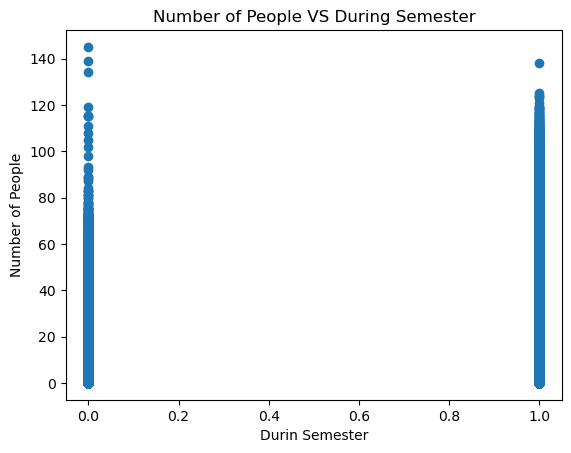

In [10]:
plt.scatter(gym['is_during_semester'], gym['number_people'])
plt.title("Number of People VS During Semester")
plt.xlabel('Durin Semester')
plt.ylabel('Number of People')
plt.show()

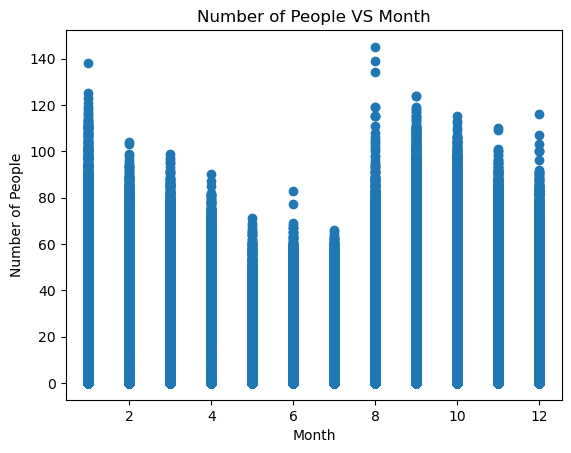

In [11]:
plt.scatter(gym['month'], gym['number_people'])
plt.title("Number of People VS Month")
plt.xlabel('Month')
plt.ylabel('Number of People')
plt.show()

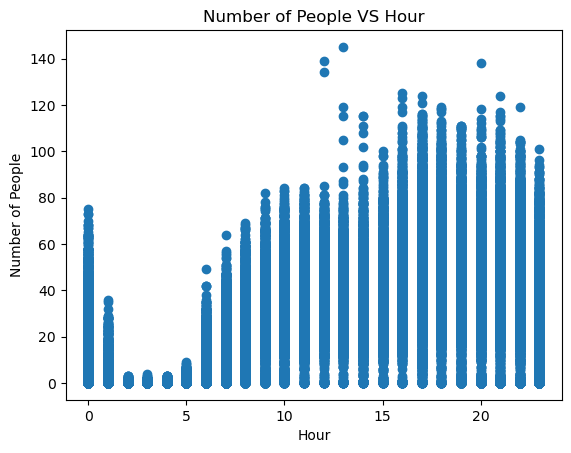

In [12]:
plt.scatter(gym['hour'], gym['number_people'])
plt.title("Number of People VS Hour")
plt.xlabel('Hour')
plt.ylabel('Number of People')
plt.show()

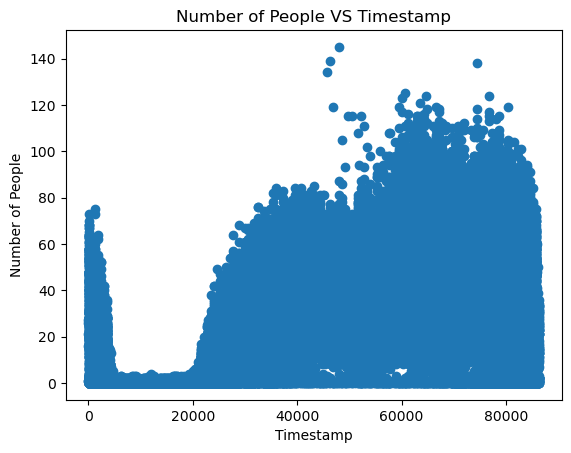

In [13]:
plt.scatter(gym['timestamp'], gym['number_people'])
plt.title("Number of People VS Timestamp")
plt.xlabel('Timestamp')
plt.ylabel('Number of People')
plt.show()

In [14]:
gym.corr(numeric_only=True)['number_people']

number_people           1.000000
timestamp               0.550218
day_of_week            -0.162062
is_weekend             -0.173958
is_holiday             -0.048249
temperature             0.373327
is_start_of_semester    0.182683
is_during_semester      0.335350
month                  -0.097854
hour                    0.552049
Name: number_people, dtype: float64

<Axes: >

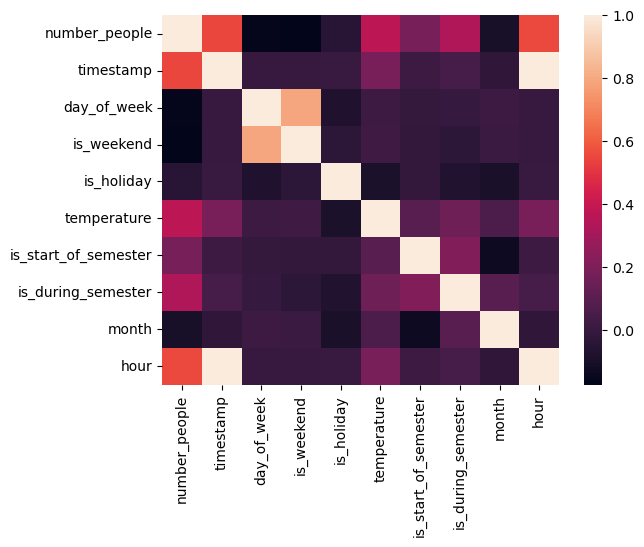

In [15]:
sb.heatmap(gym.corr(numeric_only=True))

Number_people has most correlation with timestamp, hour, temperature, is_during_semester.

We can remove the following features: 
* "timestamp" (because almost the same information we can find in the column "hour"),
* "date" (it has almost the same information as the columns "month", "day_of_the_week", "is_holiday" and "hour") 

In [16]:
gym.columns

Index(['number_people', 'date', 'timestamp', 'day_of_week', 'is_weekend',
       'is_holiday', 'temperature', 'is_start_of_semester',
       'is_during_semester', 'month', 'hour'],
      dtype='object')

In [17]:
gym = gym.drop(columns=['date', 'timestamp'], axis=1)

In [18]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   day_of_week           62184 non-null  int64  
 2   is_weekend            62184 non-null  int64  
 3   is_holiday            62184 non-null  int64  
 4   temperature           62184 non-null  float64
 5   is_start_of_semester  62184 non-null  int64  
 6   is_during_semester    62184 non-null  int64  
 7   month                 62184 non-null  int64  
 8   hour                  62184 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.3 MB


## Preparing to Build the Model

In [19]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [20]:
X = gym.drop('number_people', axis=1).copy()
y = gym['number_people']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [22]:
sdgr = SGDRegressor(random_state=5, max_iter=1500)
sdgr.fit(X_train, y_train)

SGDRegressor(max_iter=1500, random_state=5)

## Measuring the Performance of the Model

In [23]:
y_pred = sdgr.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean squared error = {mse}')
print(f'Mean absolute error = {mae}')
print(f'R2 = {r2}')

Mean squared error = 341.9154625469295
Mean absolute error = 14.876097056298796
R2 = 0.3364636113776476


## Model with Scaled Features

Since the metrics are not very good we will try to improve the model by scaling the features

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
sgdr_v2 = SGDRegressor(random_state=5, max_iter=1500)
sgdr_v2.fit(X_train_scaled, y_train)

SGDRegressor(max_iter=1500, random_state=5)

In [27]:
y_pred_v2 = sgdr_v2.predict(X_test_scaled)

In [28]:
mse_v2 = mean_squared_error(y_test, y_pred_v2)
mae_v2 = mean_absolute_error(y_test, y_pred_v2)
r2_v2 = r2_score(y_test, y_pred_v2)
print(f'Mean squared error = {mse_v2}')
print(f'Mean absolute error = {mae_v2}')
print(f'R2 = {r2_v2}')

Mean squared error = 252.15226391347264
Mean absolute error = 12.110900759153102
R2 = 0.5106620761348821


The model has improved a bit.

## Visualizing the Results

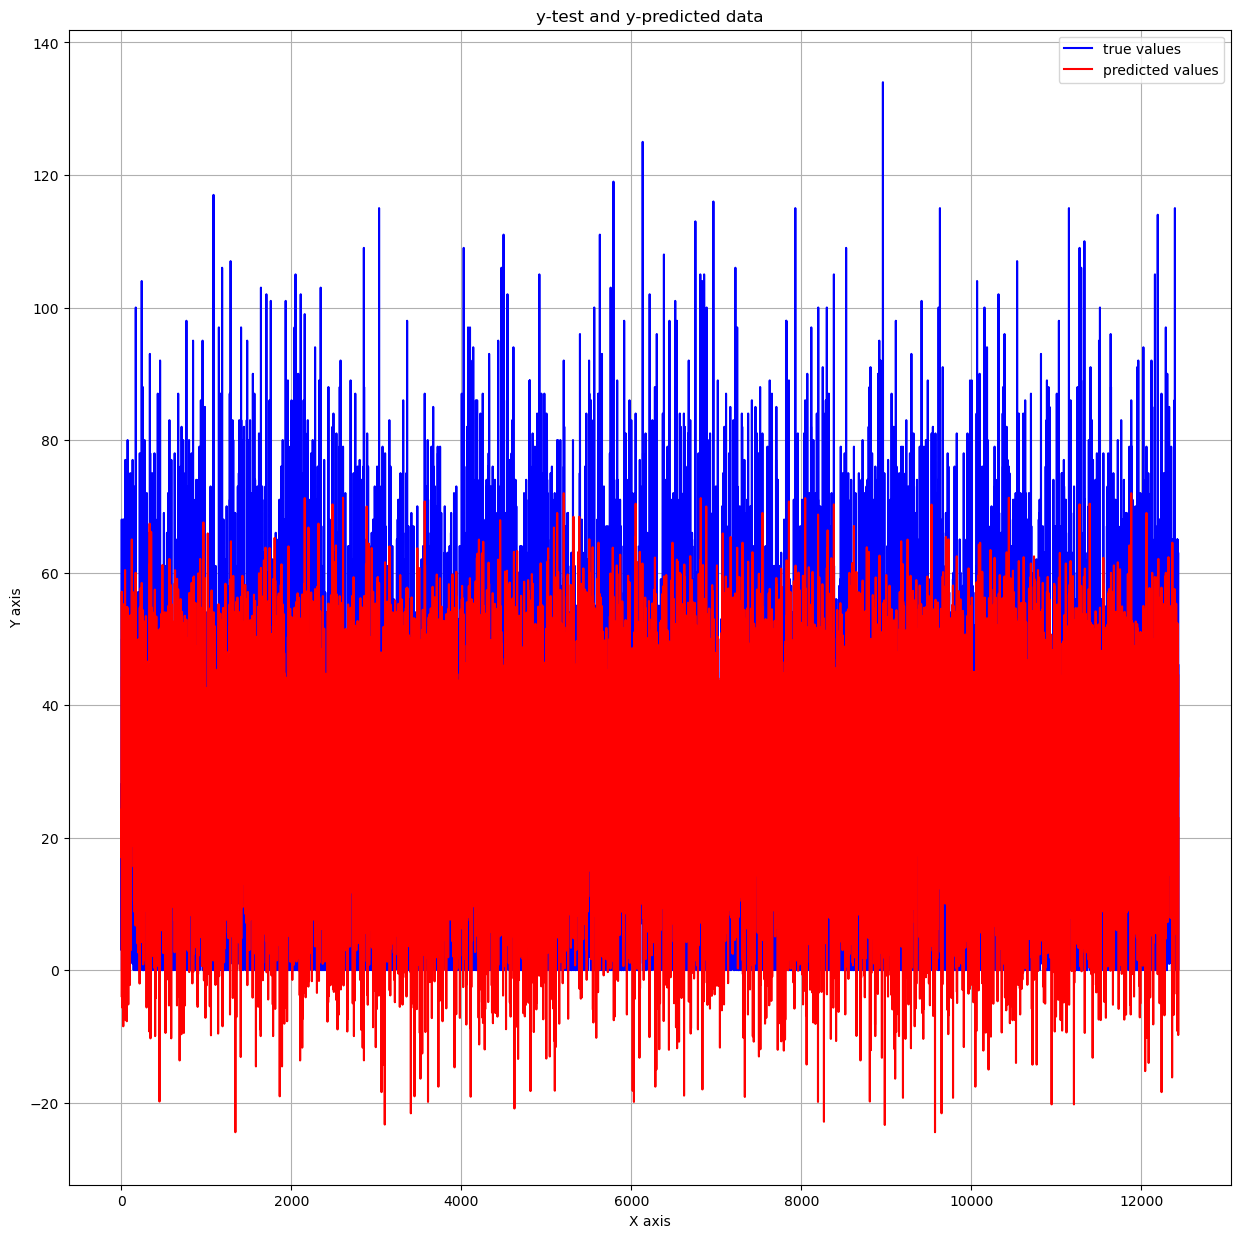

In [29]:
x_axis = range(len(y_test))
plt.figure(figsize=(15,15))
plt.plot(x_axis, y_test, color='blue', label='true values')
plt.plot(x_axis, y_pred_v2, color='red', label='predicted values')
plt.legend()
plt.title('y-test and y-predicted data')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.grid(True)
plt.show()

## Summarizing the Results

We can clearly see there is a lot of room for improvement. However, a linear regression model using Stochastic Gradient Descent is a good place to start for building such a prediction model.

We might change and test some hyperparameters, especially changing the loss function and exploring changing the learning rate and penalty.